In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn3
%matplotlib inline

### how many ads from test are in train?

there are 478950 train ads
there are 381385 test ads
test not in train: 65350, 17.13% of all test ads
Wall time: 21.5 s


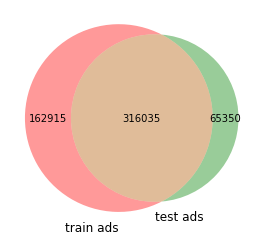

In [3]:
def venn_ads():
    train_ads = pd.read_csv('./input/clicks_train.csv', usecols=['ad_id']).ad_id.unique()
    test_ads = pd.read_csv('./input/clicks_test.csv', usecols=['ad_id']).ad_id.unique()
    print('there are {} train ads'.format(len(train_ads)))
    print('there are {} test ads'.format(len(test_ads)))
    print('test not in train: {}, {:.2f}% of all test ads'
          .format(len(np.setdiff1d(test_ads, train_ads)), 
                  len(np.setdiff1d(test_ads, train_ads))/len(test_ads)*100))
    venn2(subsets = (set(train_ads), set(test_ads)), set_labels=('train ads', 'test ads'))

%time venn_ads()

### how many documents from test are in train?

there are 756510 documents in page_views.csv
there are 756510 documents in clicks_train.csv
there are 2835560 documents in clicks_test.csv
Wall time: 13min 24s


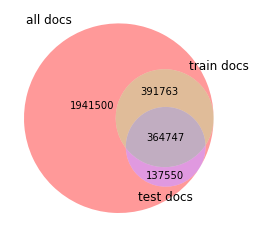

In [4]:
def venn_docs():
    events = pd.read_csv('./input/events.csv', index_col='display_id', usecols=['display_id', 'document_id'])
    train_docs = set(pd.read_csv('./input/clicks_train.csv', usecols=['display_id'])['display_id'].map(events['document_id']))
    test_docs = set(pd.read_csv('./input/clicks_test.csv', usecols=['display_id'])['display_id'].map(events['document_id']))
    print('there are {} documents in page_views.csv'.format(len(all_docs)))
    print('there are {} documents in clicks_train.csv'.format(len(train_docs)))
    print('there are {} documents in clicks_test.csv'.format(len(test_docs)))
    venn3(subsets = (all_docs, train_docs, test_docs), set_labels=('all docs', 'train docs', 'test docs'))
    
%time venn_docs()

### how many users from test are in train?

there are 14814344 users in clicks_train.csv
there are 5861229 users in clicks_test.csv
Wall time: 1min 1s


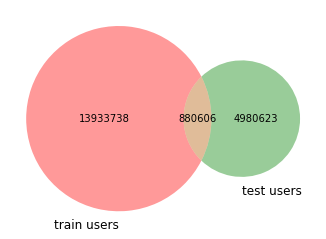

In [2]:
def venn_users():
    events = pd.read_csv('./input/events.csv', index_col='display_id', usecols=['display_id', 'uuid'])
    train_users = set(pd.read_csv('./input/clicks_train.csv', usecols=['display_id'])['display_id'].map(events['uuid']))
    test_users = set(pd.read_csv('./input/clicks_test.csv', usecols=['display_id'])['display_id'].map(events['uuid']))
    print('there are {} users in clicks_train.csv'.format(len(train_users)))
    print('there are {} users in clicks_test.csv'.format(len(test_users)))
    venn2(subsets = (train_users, test_users), set_labels=('train users', 'test users'))
    
%time venn_users()